In [1]:
%pip install matplotlib numpy seaborn pandas


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('air_quality.csv',low_memory=False)

In [4]:
unique_values = {col: data[col].unique().tolist() for col in data.columns}
for col, values in unique_values.items():
    print(f"{col} ({data[col].dtype}): {' ' * (20 - len(str(col) + str(data[col].dtype)))} {values[:10]}{'...' if len(values) > 10 else ''}")


date (object):            ['2024-08-31 23:00', '2024-08-31 22:00', '2024-08-31 21:00', '2024-08-31 20:00', '2024-08-31 19:00', '2024-08-31 18:00', '2024-08-31 17:00', '2024-08-31 16:00', '2024-08-31 15:00', '2024-08-31 14:00']...
sitename (object):        ['Hukou', 'Zhongming', 'Zhudong', 'Hsinchu', 'Toufen', 'Miaoli', 'Sanyi', 'Fengyuan', 'Shalu', 'Dali']...
county (object):          ['Hsinchu County', 'Taichung City', 'Hsinchu City', 'Miaoli County', 'Taoyuan City', 'Changhua County', 'Nantou County', 'Yunlin County', 'Chiayi County', 'Tainan City']...
aqi (float64):            [62.0, 50.0, 45.0, 42.0, 40.0, 39.0, 44.0, 46.0, 49.0, 58.0]...
pollutant (object):       ['PM2.5', nan, 'Ozone (8hr)', 'PM10', 'Nitrogen Dioxide (NO2)', 'Ozone', 'Sulfur Dioxide (SO2)', 'Carbon Monoxide (CO)']
status (object):          ['Moderate', 'Good', nan, 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
so2 (object):             ['0.9', '1.6', '0.4', '0.8', '1.0', '1.1', '1.

In [5]:
data.describe()

,aqi,unit,longitude,latitude,siteid
count,5.839188e+06,0.0,4.948588e+06,4.948588e+06,4.102739e+06
mean,5.419277e+01,NaN,1.208235e+02,2.404500e+01,5.608608e+01
std,2.985864e+01,NaN,9.644120e-01,1.002014e+00,6.233482e+01
min,-1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.200000e+01,NaN,1.203455e+02,2.304820e+01,2.100000e+01
50%,4.600000e+01,NaN,1.206853e+02,2.415196e+01,4.200000e+01
75%,7.000000e+01,NaN,1.214492e+02,2.501297e+01,6.500000e+01
max,5.000000e+02,NaN,1.218157e+02,2.625800e+01,3.140000e+02


In [6]:
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
print(missing_summary)

           Missing Values  Percentage
aqi                 43020    0.731358
pollutant         3235012   54.996559
status             142718    2.426266
so2                139768    2.376115
co                 113504    1.929616
o3                 125017    2.125341
o3_8hr             131081    2.228432
pm10               140358    2.386145
pm2.5              131438    2.234501
no2                165977    2.821679
nox                169124    2.875179
no                 169455    2.880806
windspeed          219498    3.731558
winddirec          219736    3.735604
unit              5882208  100.000000
co_8hr              81229    1.380927
pm2.5_avg           79941    1.359030
pm10_avg            89875    1.527913
so2_avg            629162   10.696018
longitude          933620   15.871931
latitude           933620   15.871931
siteid            1779469   30.251718


In [7]:
data_cleaned = data.drop(columns=['unit', 'siteid', 'pollutant', 'latitude', 'longitude', 'winddirec'])
data_cleaned = data_cleaned.dropna(subset=['aqi', 'status'])

data_cleaned.head()

,date,sitename,county,aqi,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,co_8hr,pm2.5_avg,pm10_avg,so2_avg
0,2024-08-31 23:00,Hukou,Hsinchu County,62.0,Moderate,0.9,0.17,35.0,40.2,18.0,17.0,2.3,2.6,0.3,2.3,0.2,20.1,26.0,1.0
1,2024-08-31 23:00,Zhongming,Taichung City,50.0,Good,1.6,0.32,27.9,35.1,27.0,14.0,7.6,9.3,1.6,1.1,0.2,15.3,23.0,1.0
2,2024-08-31 23:00,Zhudong,Hsinchu County,45.0,Good,0.4,0.17,25.1,40.6,21.0,13.0,2.9,4.1,1.1,0.4,0.2,13.8,24.0,0.0
3,2024-08-31 23:00,Hsinchu,Hsinchu City,42.0,Good,0.8,0.2,30.0,35.9,19.0,10.0,4.0,4.8,0.7,1.9,0.2,13.0,26.0,1.0
4,2024-08-31 23:00,Toufen,Miaoli County,50.0,Good,1.0,0.16,33.5,35.9,18.0,14.0,1.8,3.1,1.2,1.8,0.1,15.3,28.0,1.0


In [8]:
columns_to_fill = [col for col in data_cleaned.columns if col not in ('date', 'sitename', 'county', 'status', 'aqi')]

for column in columns_to_fill:
    data_cleaned[column].replace('-', np.nan, inplace=True)
    data_cleaned[column].replace('ND', np.nan, inplace=True)
    data_cleaned[column] = data_cleaned[column].astype(float)

for column in columns_to_fill:
    if data_cleaned[column].isnull().sum() > 0:
        mean = data_cleaned[column].mean(skipna=True)
        std = data_cleaned[column].std(skipna=True)
        
        random_values = np.random.normal(mean, std, size=data_cleaned[column].isnull().sum())
        data_cleaned.loc[data_cleaned[column].isnull(), column] = random_values


print("Missing values after filling in specified columns:")
print(data_cleaned.isnull().sum())


C:\Users\swapn\AppData\Local\Temp\ipykernel_15568\123106382.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].replace('-', np.nan, inplace=True)
C:\Users\swapn\AppData\Local\Temp\ipykernel_15568\123106382.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Missing values after filling in specified columns:
date         0
sitename     0
county       0
aqi          0
status       0
so2          0
co           0
o3           0
o3_8hr       0
pm10         0
pm2.5        0
no2          0
nox          0
no           0
windspeed    0
co_8hr       0
pm2.5_avg    0
pm10_avg     0
so2_avg      0
dtype: int64


In [9]:
data_cleaned.head()

,date,sitename,county,aqi,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,co_8hr,pm2.5_avg,pm10_avg,so2_avg
0,2024-08-31 23:00,Hukou,Hsinchu County,62.0,Moderate,0.9,0.17,35.0,40.2,18.0,17.0,2.3,2.6,0.3,2.3,0.2,20.1,26.0,1.0
1,2024-08-31 23:00,Zhongming,Taichung City,50.0,Good,1.6,0.32,27.9,35.1,27.0,14.0,7.6,9.3,1.6,1.1,0.2,15.3,23.0,1.0
2,2024-08-31 23:00,Zhudong,Hsinchu County,45.0,Good,0.4,0.17,25.1,40.6,21.0,13.0,2.9,4.1,1.1,0.4,0.2,13.8,24.0,0.0
3,2024-08-31 23:00,Hsinchu,Hsinchu City,42.0,Good,0.8,0.20,30.0,35.9,19.0,10.0,4.0,4.8,0.7,1.9,0.2,13.0,26.0,1.0
4,2024-08-31 23:00,Toufen,Miaoli County,50.0,Good,1.0,0.16,33.5,35.9,18.0,14.0,1.8,3.1,1.2,1.8,0.1,15.3,28.0,1.0


In [10]:
data_cleaned['sitename'].value_counts()

sitename
Hualien                        71530
Taitung                        71471
Yilan                          71338
Dongshan                       71338
Tamsui                         71269
                               ...  
Changhua (Tianwei)                38
Zhongming Elementary School       21
Dayuan (Zhubei)                   11
Lulin Mountain                     4
Shulin                             2
Name: count, Length: 120, dtype: int64

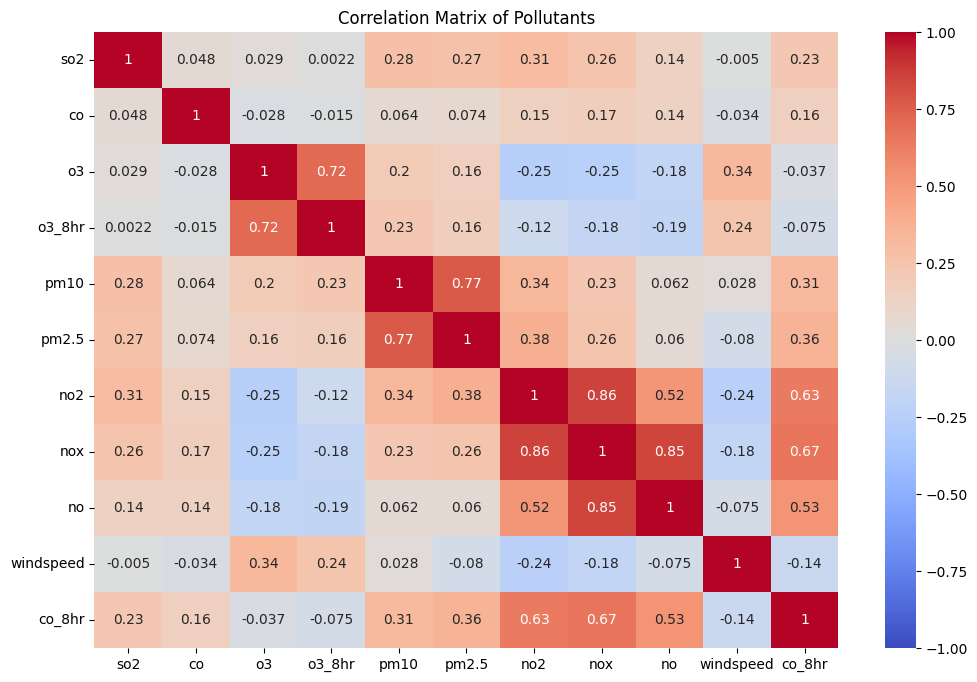

In [11]:
pollutants = ['so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed', 'co_8hr']

corr_matrix = data_cleaned[pollutants].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pollutants')
plt.show()

<Figure size 1200x600 with 0 Axes>

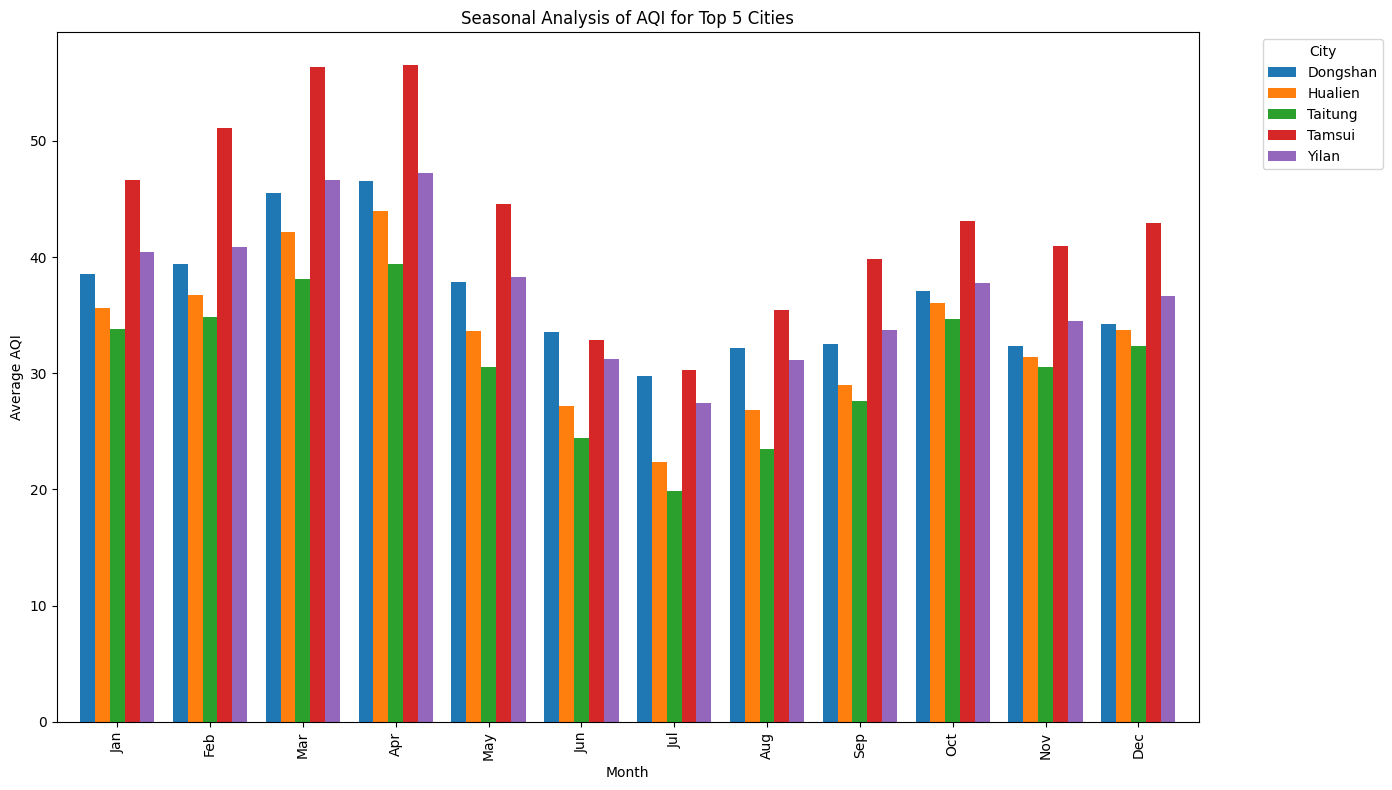

In [12]:
top_cities = data_cleaned['sitename'].value_counts().head(5).index.tolist()

data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')
data_cleaned['month'] = data_cleaned['date'].dt.month

top_cities_data = data_cleaned[data_cleaned['sitename'].isin(top_cities)]
monthly_aqi_cities = top_cities_data.groupby(['sitename', 'month'])['aqi'].mean().unstack()

plt.figure(figsize=(12, 6))
monthly_aqi_cities.T.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Seasonal Analysis of AQI for Top 5 Cities')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

<Figure size 1200x800 with 0 Axes>

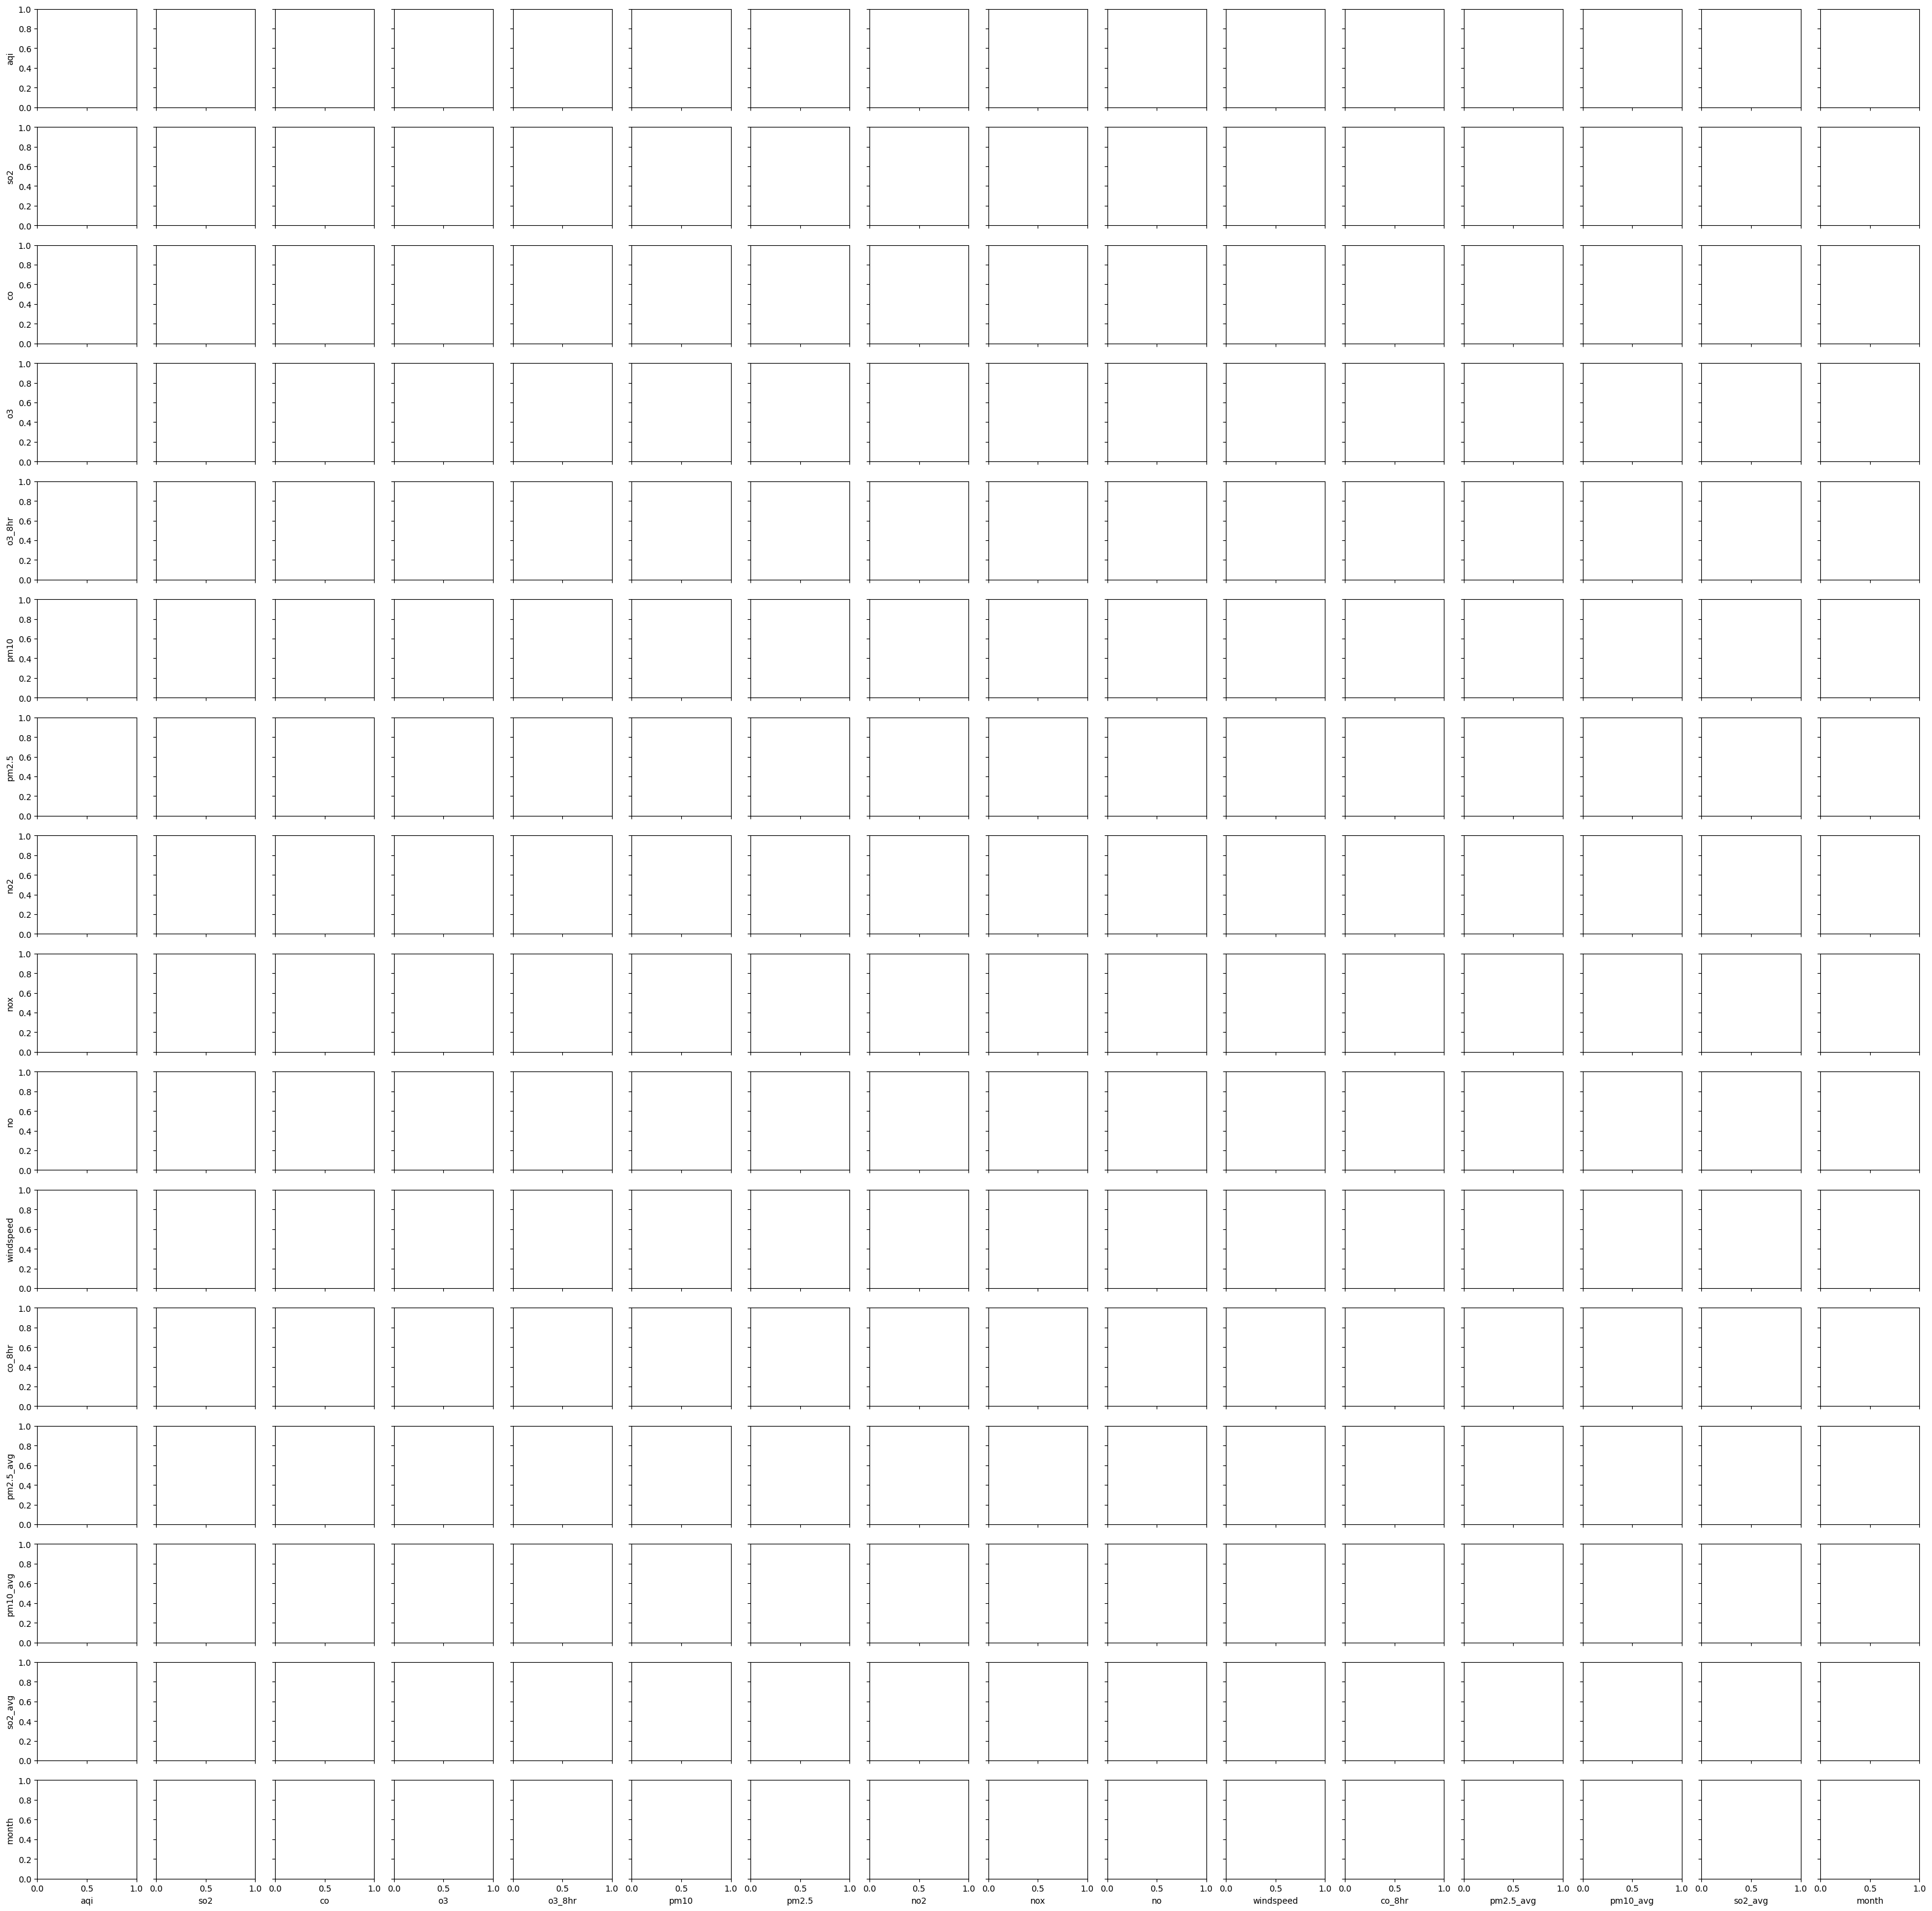

In [14]:
plt.figure(figsize=(12, 8))

sns.pairplot(data=data_cleaned, hue='status', palette='viridis', plot_kws={'alpha': 0.6})

plt.suptitle('Scatter Plot of AQI and Pollutants by Status', y=1.02)
plt.show()